In [7]:
import pandas as pd
import snowflake.connector

#login to snowflake db
con = snowflake.connector.connect(user='vishal.kumar@scale.com',
                                 account='pxa65918',
                                 authenticator='externalbrowser',
                                 warehouse='COMPUTE_WH',
                                 database='SCALE_PROD',
                                 role='GENERAL_RO')

cs = con.cursor()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


In [12]:
#Get work logs
sql = f'''
Select
  subtask,response
from
  taskattempts
where
  project = '640a1b2121f00794ddf64b06'
  and review_level = 12
  and cast(attempted_at as Date) > '2023-04-30'
limit
  10
'''
cs.execute(sql)
tdf = cs.fetch_pandas_all()


In [13]:
print(tdf)

                    SUBTASK                                           RESPONSE
0  645020a371b36cd1175102d6  {\n  "annotations": {\n    "form_leatherGrade"...
1  64518712eefef1cde5953214  {\n  "annotations": {\n    "form_assembledProd...
2  645185a3109d20300a5be161  {\n  "annotations": {\n    "form_netContent": ...
3  64501d7ecce233a1f28f6c73  {\n  "annotations": {\n    "form_accessoriesIn...
4  64501d94d94dcc5ab60093f6  {\n  "annotations": {\n    "form_technology": ...
5  64501dac9b62a6fa742d35a2  {\n  "annotations": {\n    "form_edition": {\n...
6  64501c27950872d7783dba1a  {\n  "annotations": {\n    "form_modelNumber":...
7  64501c309cc78232899b5df8  {\n  "annotations": {\n    "form_edition": {\n...
8  64501c29bbd74d06ad17547b  {\n  "annotations": {\n    "form_modelNumber":...
9  64501c256b12ea1a5248dc81  {\n  "annotations": {\n    "form_esrbRating": ...


In [10]:
#copy tdf to another dataframe
odf = tdf.copy()
#add another column in tdf called PredidctionCount
odf['PredictionCount'] = 0
#count the number of times the string 'answerChoice' appears in the metadata column
odf['PredictionCount'] = odf['METADATA'].str.count('answerChoice')
#convert created_at column to date
odf['CREATED_AT'] = pd.to_datetime(odf['CREATED_AT']).dt.date


            PredictionCount
CREATED_AT                 
2023-03-17        30.448359
2023-03-28        25.500000
2023-03-30        20.998349
2023-03-31        20.323604
2023-04-07        38.919177
2023-04-14        29.369960
2023-04-25        28.960630
2023-04-28        15.141267


<AxesSubplot:xlabel='CREATED_AT'>

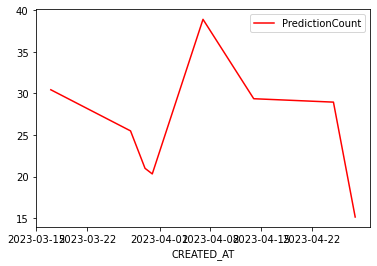

In [11]:
#calculate the average number of predictions by created_at date
ndf = odf.groupby('CREATED_AT').mean()
print(ndf)
#plot ndf as a line graph
ndf.plot(kind='line',y='PredictionCount',color='red')

In [ ]:
tdf = pd.DataFrame(columns=['attribute_name', 'attribute_value'])
#iterate through each row of idf
for index, row in idf.iterrows():
    #save each column of first row in a variable
    pvid = idf['PVID'][index]
    processed_attributes = idf['PROCESSED_ATTRIBUTES'][index]
    category = idf['CATEGORY'][index]
    isvalid = idf['ISVALID'][index]
    issues = idf['ISSUES'][index]

    #parse variable with json processed_attributes and concat to adf dataframe
    for key, value in processed_attributes.items():
        adf = pd.concat([adf, pd.DataFrame([[key, value]], columns=['attribute_name', 'attribute_value'])], ignore_index=True)
    #print(adf)
    
    #iterate through each row of adf
    for index, row in adf.iterrows():
        #save value of attribute_name and attribute_value in variables
        attribute_name = row['attribute_name']
        attribute_value = row['attribute_value']

        #----------------------------------------------------------------------
        #Start attribute level processing and validations
        #----------------------------------------------------------------------
#adf.to_csv(json_path + 'adf.csv', index=False)